In [ ]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='', project_access_token='')
pc = project.project_context

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [ ]:
!pip install scikit-learn==0.20.3 --upgrade

In [ ]:
!pip install xgboost==0.71 --upgrade

In [ ]:
!pip install imblearn --upgrade

<hr>

## Download dos conjuntos de dados em formato .csv

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Insira aqui o pandasDataFrame.
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

df_data_1 = pd.read_csv(body)
df_training_dataset = df_data_1
df_training_dataset.head()

Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

## Removendo linhas duplicadas

In [ ]:
df_training_dataset.drop_duplicates(subset ="row", keep = "first", inplace = True)

In [ ]:
df_training_dataset.info()

In [ ]:
df_training_dataset.nunique()

In [ ]:
df_training_dataset.describe()

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

## Analisando os dados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Analisando a dinâmica do estoque de uma estação especifica

In [ ]:
df_training_dataset[df_training_dataset['Estação']=='Trianon-Masp'].sort_values(by='Tempo').head(20)

## Mapa de correlação

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Mapa de correlação entre as variáveis")
df = df_training_dataset.iloc[:, 5:14]
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1, center=0)

## Balanceamento das classes

In [ ]:
sns.countplot(x='TARGET', data=df_training_dataset)

## Outliers

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(28,10))

sns.boxplot(y='Açaí-Guaraná', data=df_training_dataset, ax=axes[0,0])
sns.boxplot(y='Citrus', data=df_training_dataset, ax=axes[0,1])
sns.boxplot(y='Maçã-Verde', data=df_training_dataset, ax=axes[0,2])
sns.boxplot(y='Original_269', data=df_training_dataset, ax=axes[1,0])
sns.boxplot(y='Original_473', data=df_training_dataset, ax=axes[1,1])
sns.boxplot(y='Pêssego', data=df_training_dataset, ax=axes[1,2])
sns.boxplot(y='Tangerina', data=df_training_dataset, ax=axes[2,0])
sns.boxplot(y='Zero', data=df_training_dataset, ax=axes[2,1])
sns.boxplot(y='Movimentação', data=df_training_dataset, ax=axes[2,2])

# Criando de novas colunas para analisar a dispersão dos dados

In [ ]:
df_copy = df_training_dataset[['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 'Original_473', 'Pêssego', 'Tangerina', 'Zero']]

### Coluna Total Estoque (Em unidades)

In [ ]:
def sum_columns(row):
    return sum(row)

#Nova coluna com a soma da quantidade de cada tipo de energetico no estoque
df_training_dataset['Total_Estoque'] = df_copy.apply(sum_columns, axis=1)

### Colunas Estoque máximo e Estoque mínimo (Em unidades)

In [ ]:
def min_value(row):
    return min(row)

#Nova coluna com a menor quantidade de energetico no estoque
df_training_dataset['Min_Estoque'] = df_copy.apply(min_value, axis=1)

#Nova coluna com a maior quantidade de energetico no estoque
def max_value(row):
    return max(row)

df_training_dataset['Max_Estoque'] = df_copy.apply(max_value, axis=1)

### Coluna Percentual Total do Estoque

In [ ]:
total_itens = max(df_copy['Açaí-Guaraná']) + max(df_copy['Citrus']) + max(df_copy['Maçã-Verde']) + max(df_copy['Original_269']) + max(df_copy['Original_473']) + max(df_copy['Pêssego']) + max(df_copy['Tangerina']) + max(df_copy['Zero'])

def percentual_estoque(row):
    return int((sum(row)/total_itens)*100)    

#Nova coluna com a menor quantidade de energetico no estoque
df_training_dataset['Percentual_Total_Estoque'] = df_copy.apply(percentual_estoque, axis=1)

### Coluna Percentual de cada item no estoque

In [ ]:
df_training_dataset['P_Açaí-Guaraná'] = df_training_dataset['Açaí-Guaraná'].apply(lambda x: int((x/max(df_training_dataset['Açaí-Guaraná']))*100))
df_training_dataset['P_Citrus'] = df_training_dataset['Citrus'].apply(lambda x: int((x/max(df_training_dataset['Citrus']))*100))
df_training_dataset['P_Maçã-Verde'] = df_training_dataset['Maçã-Verde'].apply(lambda x: int((x/max(df_training_dataset['Maçã-Verde']))*100))
df_training_dataset['P_Original_269'] = df_training_dataset['Original_269'].apply(lambda x: int((x/max(df_training_dataset['Original_269']))*100))
df_training_dataset['P_Original_473'] = df_training_dataset['Original_473'].apply(lambda x: int((x/max(df_training_dataset['Original_473']))*100))
df_training_dataset['P_Pêssego'] = df_training_dataset['Pêssego'].apply(lambda x: int((x/max(df_training_dataset['Pêssego']))*100))
df_training_dataset['P_Tangerina'] = df_training_dataset['Tangerina'].apply(lambda x: int((x/max(df_training_dataset['Tangerina']))*100))
df_training_dataset['P_Zero'] = df_training_dataset['Zero'].apply(lambda x: int((x/max(df_training_dataset['Zero']))*100))

### Percentual mínimo e máximo no estoque

In [ ]:
df_copy = df_training_dataset[['P_Açaí-Guaraná', 'P_Citrus', 'P_Maçã-Verde', 'P_Original_269', 'P_Original_473', 'P_Pêssego', 'P_Tangerina', 'P_Zero']]

In [ ]:
import numpy as np

def min_percentual_value(row):
    return min(row)

def max_percentual_value(row):
    return max(row)

def mean_percentual_value(row):
    return int(np.median(row))

#Nova coluna com a menor quantidade de energetico no estoque
df_training_dataset['Min_Percentual_Estoque'] = df_copy.apply(min_percentual_value, axis=1)
df_training_dataset['Max_Percentual_Estoque'] = df_copy.apply(max_percentual_value, axis=1)
df_training_dataset['Mean_Percentual_Estoque'] = df_copy.apply(mean_percentual_value, axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28,10))

sns.scatterplot(x='Min_Percentual_Estoque', y='Percentual_Total_Estoque', hue='TARGET', data=df_training_dataset, ax=axes[0])
sns.scatterplot(x='Min_Percentual_Estoque', y='Max_Percentual_Estoque', hue='TARGET', data=df_training_dataset, ax=axes[1])
sns.scatterplot(x='Min_Percentual_Estoque', y='Mean_Percentual_Estoque', hue='TARGET', data=df_training_dataset, ax=axes[2])

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [ ]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [ ]:
df_training_dataset_imputed.tail()

In [ ]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

In [ ]:
df_training_dataset_rmcolumns.tail()

# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [ ]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Variável a ser aplicado método getDumies()'])
#df_training = df_training_dataset_rmcolumns
df_training = df_training_dataset[['Min_Estoque', 'Max_Estoque', 'Total_Estoque', 'TARGET']]
df_training.head()

,Min_Estoque,Max_Estoque,Total_Estoque,TARGET
0,5,86,196,REABASTECER
1,12,73,321,NORMAL
2,4,51,213,REABASTECER
3,9,58,235,NORMAL
4,5,50,253,REABASTECER


# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [ ]:
df_training.columns

In [ ]:
features = df_training[
    [
        'Min_Estoque', 'Max_Estoque', 'Total_Estoque'  
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

In [ ]:
features.head()

## Padronizando os dados com Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler_data = scaler.fit_transform(features)

# convert the array back to a dataframe
features = pd.DataFrame.from_records(data=scaler_data)

In [ ]:
features.head()

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=133)

### Treinando o modelo baseado em árvore de decisão

In [ ]:
# Método para criar um árvore de decisão
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

# Acurácia alcançada pela árvore de decisão
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

Acurácia: 77.0%


In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NORMAL       0.90      0.74      0.81      2718
 REABASTECER       0.59      0.82      0.69      1240

   micro avg       0.77      0.77      0.77      3958
   macro avg       0.75      0.78      0.75      3958
weighted avg       0.80      0.77      0.77      3958



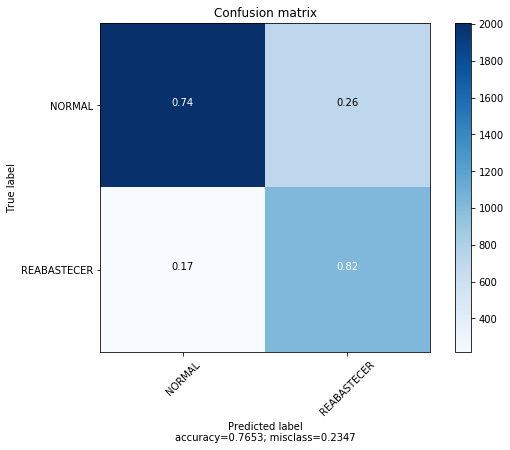

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

## Treinando o modelo usando SVM

In [ ]:
# Método para criar o Support Vector Machine
from sklearn import svm

svc_classifier = svm.SVC(kernel='rbf', gamma='auto')

svc_classifier.fit(X_train, y_train)

y_pred = svc_classifier.predict(X_test)

# Acurácia alcançada pela árvore de decisão
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

In [ ]:
print (classification_report(y_test, y_pred))

## Treinando o modelo com o algoritmo KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=80)

knn.fit(X_train, y_train)

# Realização de teste cego no modelo criado
y_pred = knn.predict(X_test)

# Acurácia alcançada pela árvore de decisão
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

In [ ]:
print (classification_report(y_test, y_pred))

## Treinando o modelo com XBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xg_boost = XGBClassifier(max_depth=2)
xg_boost.fit(X_train, y_train)

# Realização de teste cego no modelo criado
y_pred = xg_boost.predict(X_test)

# Acurácia alcançada pela árvore de decisão
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

In [ ]:
print (classification_report(y_test, y_pred))

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

### Analisando a qualidade do modelo através da matriz de confusão

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [ ]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-10 00:15:45--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv.2’

    [ <=>                                   ] 70,291      --.-K/s   in 0.002s  

2020-09-10 00:15:45 (38.8 MB/s) - ‘to_be_scored.csv.2’ saved [70291]



,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [ ]:
df_to_be_scored.info()

<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [ ]:
df_copy = df_to_be_scored[['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 'Original_473', 'Pêssego', 'Tangerina', 'Zero']]

#1 - Adiciona uma noa coluna 'Total Estoque'
def sum_columns(row):
    return sum(row)

#Nova coluna com a soma da quantidade de cada tipo de energetico no estoque
df_to_be_scored['Total_Estoque'] = df_copy.apply(sum_columns, axis=1)


#2 - Adiciona 2 novas colunas 'Min Estoque' e 'Max Estoque'
def min_value(row):
    return min(row)

def max_value(row):
    return max(row)

df_to_be_scored['Min_Estoque'] = df_copy.apply(min_value, axis=1)
df_to_be_scored['Max_Estoque'] = df_copy.apply(max_value, axis=1)


# 3 - Remoção de colunas
df_to_be_scored_2 = df_to_be_scored.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Original_269', 'Original_473', 'Pêssego', 'Tangerina', 'Zero'], inplace=False)

# 4 - from sklearn.preprocessing import StandardScaler

features = df_to_be_scored_2[['Min_Estoque', 'Max_Estoque', 'Total_Estoque']]
scaler = StandardScaler()
scaler_data = scaler.fit_transform(features)

# convert the array back to a dataframe
df_to_be_scored_3 = pd.DataFrame.from_records(data=scaler_data)

df_to_be_scored_3.tail()

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [ ]:
df_training[
    [
        'Min_Estoque', 'Max_Estoque', 'Total_Estoque' 
    ]
].columns

In [ ]:
df_to_be_scored_3.columns

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [ ]:
y_pred = xg_boost.predict(df_to_be_scored_3)
df_to_be_scored['TARGET'] = y_pred
df_to_be_scored.head()

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored.to_csv(index=False))

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
